<a href="https://colab.research.google.com/github/shaimathamer/Neural-Network-/blob/main/Gradiant_Distant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **we are goint to built Gradiant Distant NN**

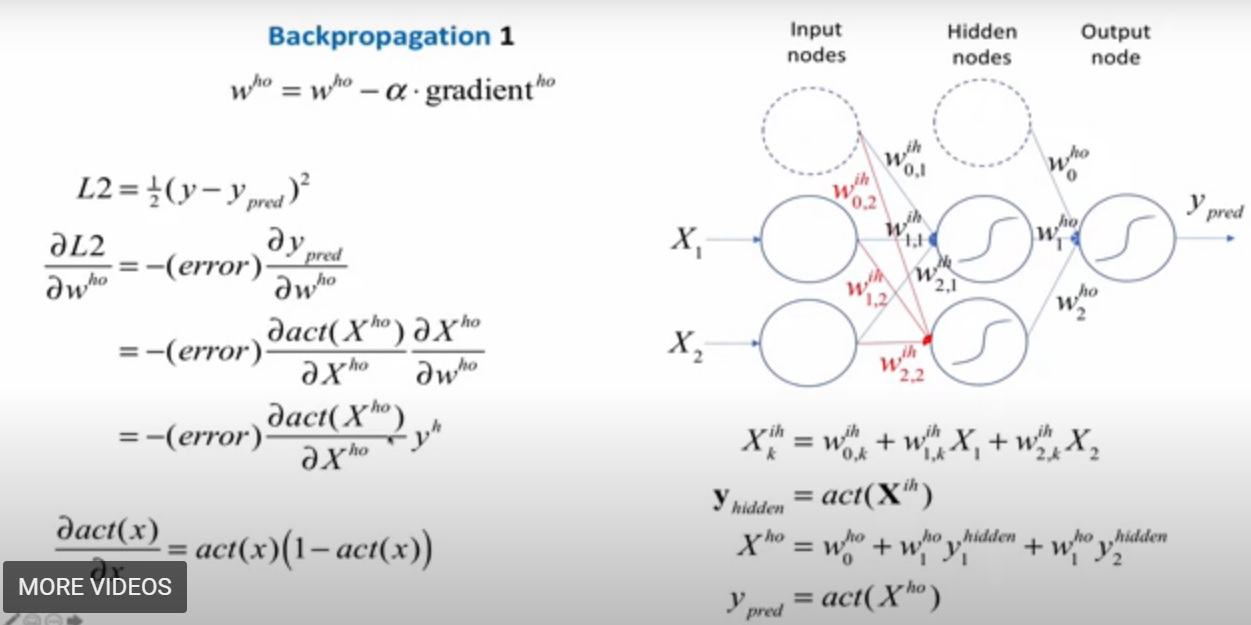

   x1  x2  y
0   0   0  1
1   1   1  1
2   0   1  0
3   1   1  1


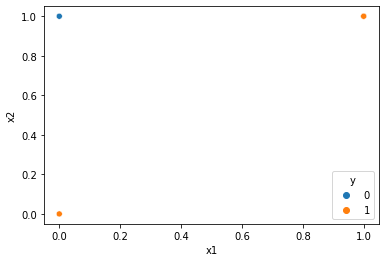

In [19]:
import math as  ma
import numpy as ny
import pandas as py
import seaborn as se
import matplotlib.pyplot as plt


x_y=[[0,0,1],[1,1,1],[0,1,0],[1,1,1]]
data=py.DataFrame(x_y,columns=['x1','x2','y'])
print(data)
se.scatterplot(x='x1',y='x2',hue='y',data=data)

In [20]:
def activation (x):
  act=1/(1+ny.exp(-x))
  return act

def deactivation(y):
  de_act=y*(1-y)
  return de_act

In [27]:
x=data[['x1','x2']]
N=len(x)
one=ny.ones((1,N))
#XP=ny.c_[one,x]
xp=ny.concatenate((one.T,x),axis=1)
y=data['y']
y=y.values.reshape(1,-1)
#w=2*ny.random.rand(3)-1
epochs=15000
widthi=2*ny.random.rand(2,3)-1
widtho=2*ny.random.rand(1,3)-1
learning_rate= 0.01
for epoch in range(epochs):
  x_input=widthi @ xp.T
  y_hiden=activation(x_input)
  y_hiden=ny.concatenate((one,y_hiden))  
  ywho=widtho @ y_hiden
  y_predicatied=activation(ywho)
  errror=y-y_predicatied
  #print('Y_Acual',y,'Y-Predicted',y_predicatied,)
  los=0.5*ny.mean(errror**2)
  #print(los)
  #######################from here will start work back probgation to genertae gradiant 
  
  error_hid=(errror*deactivation(y_predicatied)).T @ widtho[:,1:]
 
  gradient_h=-(1/N)*(errror*deactivation(y_predicatied))@ y_hiden.T
  gradiant_in=-(1/N)*(error_hid.T * deactivation(y_hiden[1:,:]))@ xp

  widtho=widtho -(learning_rate*gradient_h)
  widthi=widthi -(learning_rate*gradiant_in)
  print(gradient_h)

  if epoch%(epochs/10) == 0:
    los=0.5*ny.mean(errror**2)
    

data['prdictedit']=y_predicatied[0]
print(data)
 # ee=0.5*ny.mean((y-y_predicatied)**2)
  #print(ee)
 

  
  


Streaming output truncated to the last 5000 lines.
[[-0.00228205  0.00789948  0.00084442]]
[[-0.00228216  0.00789995  0.00084447]]
[[-0.00228228  0.00790042  0.00084451]]
[[-0.00228239  0.00790089  0.00084456]]
[[-0.0022825   0.00790136  0.00084461]]
[[-0.00228262  0.00790183  0.00084465]]
[[-0.00228273  0.0079023   0.0008447 ]]
[[-0.00228284  0.00790277  0.00084474]]
[[-0.00228296  0.00790324  0.00084479]]
[[-0.00228307  0.00790371  0.00084484]]
[[-0.00228318  0.00790418  0.00084488]]
[[-0.0022833   0.00790465  0.00084493]]
[[-0.00228341  0.00790512  0.00084497]]
[[-0.00228352  0.00790559  0.00084502]]
[[-0.00228364  0.00790606  0.00084507]]
[[-0.00228375  0.00790653  0.00084511]]
[[-0.00228387  0.007907    0.00084516]]
[[-0.00228398  0.00790747  0.0008452 ]]
[[-0.00228409  0.00790794  0.00084525]]
[[-0.00228421  0.00790841  0.0008453 ]]
[[-0.00228432  0.00790888  0.00084534]]
[[-0.00228443  0.00790936  0.00084539]]
[[-0.00228455  0.00790983  0.00084543]]
[[-0.00228466  0.0079103   0.

[[-0.64674525 -1.38037072  1.12715434]
 [-0.96633191 -0.70560824 -0.27064556]]


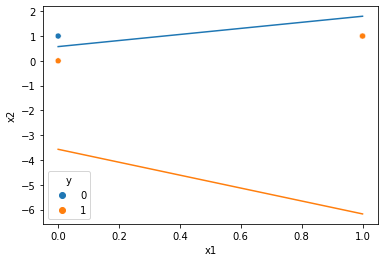

In [28]:
se.scatterplot(x='x1',y='x2',hue='y',data=data)
discion_bondary1= -(widthi[0][0]+widthi[0][1]*data['x2'])/(widthi[0][2])
discion_bondary2= -(widthi[1][0]+widthi[1][1]*data['x2'])/(widthi[1][2])
plt.plot(data['x2'],discion_bondary1)
plt.plot(data['x2'],discion_bondary2)
print(widthi)
